# Упражнение 1
Пилообразный сигнал линейно нарастает от -1 до 1, а затем резко падает до -1 и повторяется. См. https://en.wikipedia.org/wiki/Sawtooth_wave <br>
Напишите класс, называемый SawtoothSignal, расширяющий signal и предоставляющий evaluate для оценки пилообразного сигнала.<br>
Вычислите спектр пилообразного сигнала. Как соотносится его гармоническая структура с треугольным и прямоугольным сигналами?


In [1]:
# Get thinkdsp.py

import os

if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

--2022-04-10 12:40:09--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2022-04-10 12:40:09--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48687 (48K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.55K  --.-KB/s    in 0.001s  

2022-04-10 12:40:09 (58.3 MB/s) - ‘thinkdsp.py’ saved [48687/48687]



Напишем класс расширяющий Signal и определим его поведение.

In [2]:
from thinkdsp import Signal
from math import pi
from thinkdsp import unbias,normalize
import numpy as np


class SawtoothSignal(Signal):

  def __init__(self, freq=440, amp=1.0, offset = 0):
    self.freq = freq
    self.amp = amp
    self.offset = offset

  @property
  def period(self): return 1.0 / self.freq

  def evaluate(self,ts):
    cycles = self.freq * ts + self.offset / np.pi / 2
    frac, _ = np.modf(cycles)
    ys = normalize(unbias(frac), self.amp)
    return ys

Теперь это звучит так:

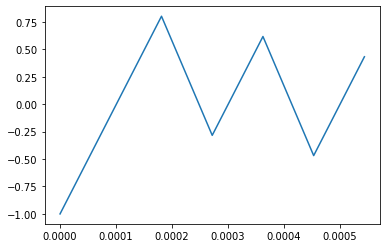

In [4]:
saw_signal = SawtoothSignal(5000)
saw_signal.plot()
saw_signal.make_wave().make_audio()

Посмотрим на спектрограмму


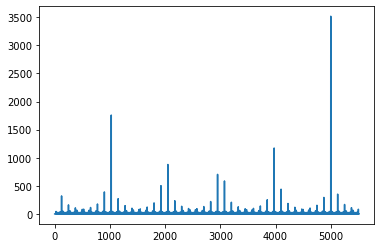

In [5]:
saw_spectrum = saw_signal.make_wave().make_spectrum()
saw_spectrum.plot()

Сравним с прямоугольным и треугольным сигналом

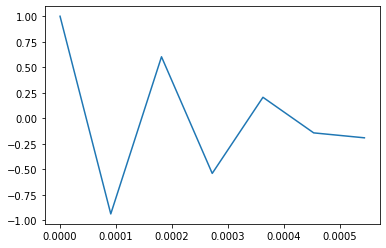

In [6]:
from thinkdsp import TriangleSignal

tri_signal = TriangleSignal(5000)
tri_signal.plot()
tri_signal.make_wave().make_audio()

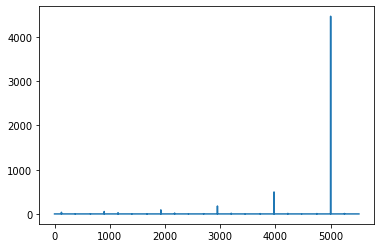

In [7]:
tri_spectrum = tri_signal.make_wave().make_spectrum()
tri_spectrum.plot()

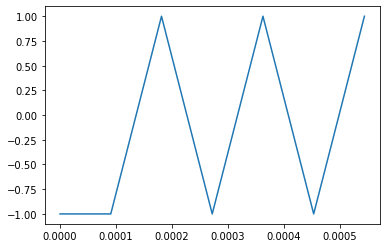

In [13]:
from thinkdsp import SquareSignal

square_signal = SquareSignal(5000)
square_signal.plot()
square_signal.make_wave().make_audio()

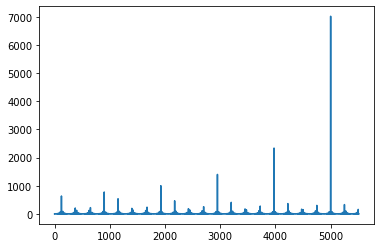

In [14]:
square_spectrum = square_signal.make_wave().make_spectrum()
square_spectrum.plot()

Сравним спектрограммы наглядно:


In [15]:
saw_spectrum.peaks()[:6]


[(3517.3720782247915, 5000.0),
 (1758.7306653291216, 1025.0),
 (1172.5366972533648, 3975.0),
 (879.4545930251493, 2050.0),
 (703.6172372961099, 2950.0),
 (586.4022589889687, 3075.0)]

In [11]:
tri_spectrum.peaks()[:3]

[(4468.306070662806, 5000.0),
 (496.49524965064813, 3975.0),
 (178.75038470619575, 2950.0)]

In [16]:
square_spectrum.peaks()[:3]

[(7018.705088812729, 5000.0),
 (2339.4939584040976, 3975.0),
 (1403.6070882352665, 2950.0)]

Как видим треугольный сигнал от прямоугольного отличают амплитуды, прямоугольная ампилтуда обратно пропорциональна частоте, а треугольная амплитутда обратно пропорционально квадрату частоты.

А пилообразный сигнал от треугольного отличает то, что в пилообразном есть четные гармоники и коэффициент пропорциональности меньше.


# Упражнение 2
Создайте прямоугольный сигнал 1100 Гц и вычислите wave с выборками 10 000 кадров в секунду. Постройте спектр и убедитесь, что большинство гармоник завернуты из-за биений. Слышны ли последствия этого при проигрывании?


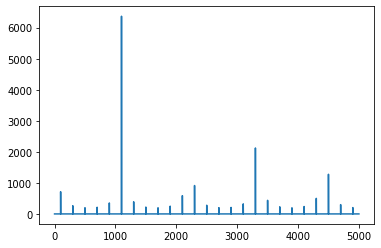

In [17]:
square_signal = SquareSignal(freq=1100)
square_wave = square_signal.make_wave(duration = 1, framerate = 10000)
square_spectrum = square_wave.make_spectrum()
square_spectrum.plot()

In [18]:
square_spectrum.peaks()[:5]

[(6367.182534102138, 1100.0),
 (2125.0234754609446, 3300.0),
 (1278.179301804898, 4500.0),
 (916.3945635352013, 2300.0),
 (716.3133230172564, 100.0)]

По идее, 3 гармоника должна быть на частоте 5500, но мы видим ее на частоте 4500, это как раз связанно с заверткой на частоте 5000.<br>
4 гармоника должна быть на частоте 7700, после 5500 частоты мы оказались на 4500. У нас осталось еще 7700- 5500 = 2200. Вычитаем 4500 - 2200 = 2300. И видим что дейстивтельно четвертая гармоника находится на 2300.<br>
А 5 гармоника из за биений оказалась на 100 частоте и стала основной вместо 1100.


Я предлагаю увеличить выборку в 4 раза и послушать более приблеженный звук, который должен получится при прямоугольном сигнале в 1100 Гц, и послушаем отличаются они или нет.


In [19]:
high_res_wave = square_signal.make_wave(duration = 1, framerate = 40000)

Ради интереса посмотрим спектрограмму

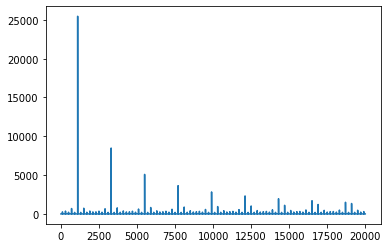

In [20]:
high_res_wave.make_spectrum().plot()

Да, по идее это должен быть более приблеженный к оригиналу сигнал, т.к. сдесь тоже есть биения, но они относительно предыдущего сигнала гораздо меньше влияют и соотношения биений к основным частотам гораздо меньше.


Оригинал:

In [21]:
square_wave.make_audio()

Тот же сигнал с более большой разрешающей способностью:


In [22]:
high_res_wave.make_audio()

Мы слышим существенную разницу.


# Упражнение 3
Возьмите объект Spectrum и распечатайте несколько первых значений spectrum.fs. Убедитесь, что они начинаются с нуля, то есть Spectrim.hs[0] - амплитута компоненты с частотой 0. Но что это значит?<br>
Проведите такой эксперимент:
  - 1. Создайте треугольный сигнал с частотой 440 Гц и wave длительностью 0,01 секунд. Распечатайте сигнал.
  - 2. Создайте объект Spectrum и распечатайте Spectrum.hs[0]. Каковы амплитуда и фаза этого коспонента?
  - 3. Установите Spectrum.hs[0] = 100. Как эта операция повлияет на сигнал? Подсказка: Spectrum дает метод, называемый make_wave, вычисляющий wave, соответствующий Spectrum.

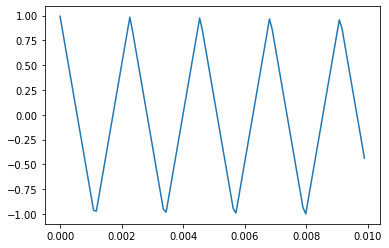

In [23]:
signal = TriangleSignal(freq=440)
wave = signal.make_wave(duration = 0.01)
long_wave = signal.make_wave(duration = 0.5)
wave.plot()

In [24]:
long_spectrum = long_wave.make_spectrum()
long_wave.make_audio()

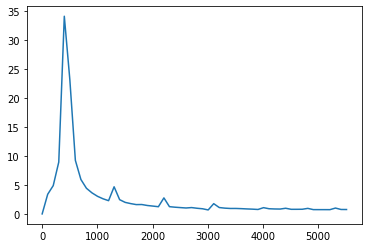

In [25]:
spectrum = wave.make_spectrum()
spectrum.hs[0]
spectrum.plot()

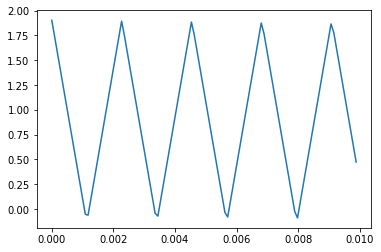

In [26]:
spectrum.hs[0] = 100
wave = spectrum.make_wave()
wave.plot()

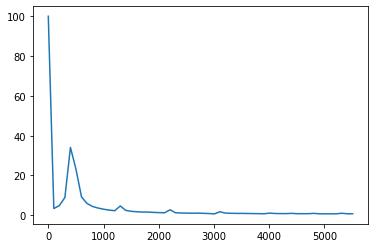

In [27]:
spectrum.plot()

In [28]:
long_spectrum.hs[0] = 100000
long_wave = long_spectrum.make_wave()
long_wave.make_audio()

Мы видим как сигнал сместился по вертикали вверх. Т.е. нулевой элемент отвечает за смешение. На звук это слышится, как будто сигнал стал тише.

# Упражнение 4
Напишите функцию, принимающую Spectrum как параметр и изменяющую его делением каждого элемента hs на соответсвующую частоту из fs. Подсказка: поскольку деление на ноль не определено, надо задать Spectrum.hs[0] = 0.<br>
Проверьте эту функцию, используя прямоугольный, треугольный или пилообразный сигналы:<br>
  - 1. Вычислите Spectrum и распечатайте его.
  - 2. Измените Spectrum, вновь используя свою функцию, и распечатайте его.
  - 3. Используйте Spectrum.make_wave, чтобы сделать wave из измененного Spectrum, и прослушайте его. Как эта операция повлияла на сигнал?



In [30]:
def spectrum_high_filter(spectrum):
    spectrum.hs[0] = 0
    spectrum.hs[1:] /= spectrum.fs[1:]

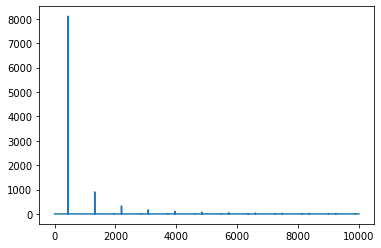

In [31]:
signal = TriangleSignal(freq=440)
wave = signal.make_wave(duration = 1, framerate = 20000)
spectrum = wave.make_spectrum()
spectrum.plot()
wave.make_audio()

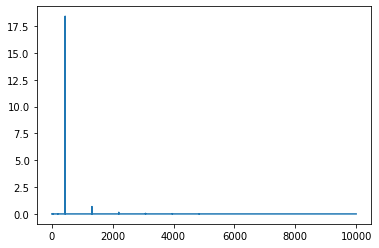

In [32]:
spectrum_high_filter(spectrum)
wave = spectrum.make_wave()
spectrum.plot()
wave.make_audio()

Как мы видим как высокие частоты сильно порезались, основные гармоники остались, только чем дальше они по высоте тем меньше влияют на сигнал, что закономерно из нашей функции.<br>
У нас была достаточно высокая частота дискретизации, но если она будет меньше то у нас скорее всего будут большие проблемы с биениями.

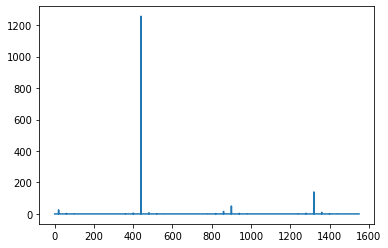

In [33]:
wave = signal.make_wave(duration = 1, framerate = 3100)
spectrum = wave.make_spectrum()
spectrum.plot()
wave.make_audio()

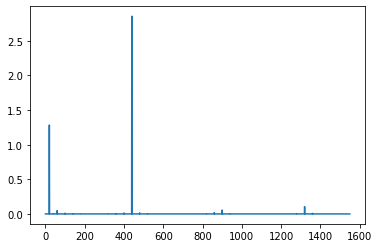

In [34]:
spectrum_high_filter(spectrum)
wave = spectrum.make_wave()
spectrum.plot()
wave.make_audio()

In [35]:
spectrum.peaks()[:2]

[(2.8556317899380472, 440.0), (1.28422929766153, 20.0)]

Вот яркий пример, у нас появилась ярко выраженная частота около 20 герц, которая сильно бьет по ушам (если слушаешь в наушниках).

# Упражнение 5
У треугольных и прямоугольных сигналов есть только нечентые гармоники; в пилообразном сигнале есть и четные, и нечетные гармоники. Гармоники прямоугольных и пилообразных сигналов уменьшаются пропорционально 1/f; гармоники треугольных сигналов - пропорционально 1/f^2. Можно ли найти сигнал, состоящий из четных и нечетных гармоник, спадающих пропорционально 1/f^2?<br>
Подсказка: для этого есть два способа. Можно собрать желаемый сигнал из синусоид, а можно взять сигнал со спектром похожим на необходимый, и изменять его параметры.

Решение такое, как подсказали в задании, у нас етсь подходящий пилообразный сигнал, который уменьшается пропорционально 1/f, а нам нужно 1/f^2. Тогда мы возьмем наш пилообразный сигнал и поделим каждую амплитуду на герцовку.<br>
Но мы уже реализовывали такую функцию в предыдущем пункте, поэтому используем ее.


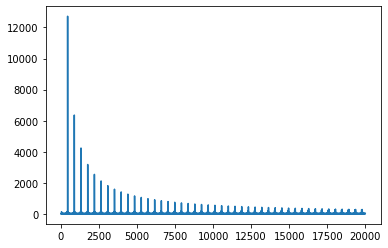

In [36]:
signal = SawtoothSignal(freq=440)
wave = signal.make_wave(duration = 1, framerate = 40000)
spectrum = wave.make_spectrum()
spectrum.plot()
wave.make_audio()

In [37]:
spectrum.peaks()[:5]

[(12720.325955572624, 440.0),
 (6360.1851837041095, 880.0),
 (4240.148129480585, 1320.0),
 (3180.1370051586446, 1760.0),
 (2544.1362533465294, 2200.0)]

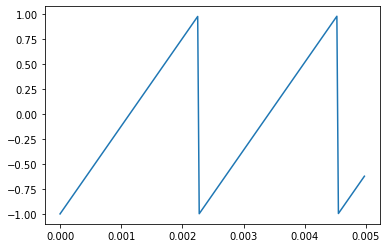

In [38]:
wave.segment(duration = 0.005).plot()

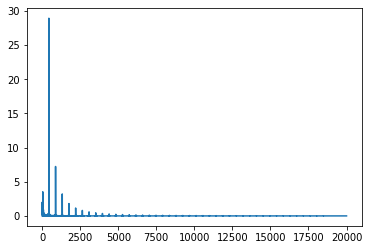

In [39]:
spectrum_high_filter(spectrum)
wave = spectrum.make_wave()
spectrum.plot()

In [40]:
spectrum.peaks()[:5]

[(28.90983171721051, 440.0),
 (7.227483163300123, 880.0),
 (3.5288895824597533, 40.0),
 (3.212233431424686, 1320.0),
 (1.9981018032870936, 1.0)]

Мы получили нужный нам результат, но и получили артефакты на низких частотах из за биения, как я демонстрировал в пункте выше. Обрежем эти частоты.

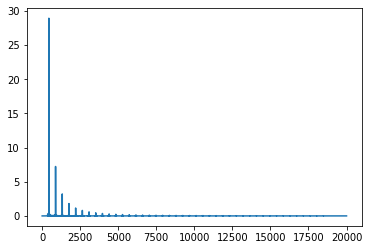

In [41]:
spectrum.high_pass(350)
spectrum.plot()

In [42]:
spectrum.peaks()[:5]

[(28.90983171721051, 440.0),
 (7.227483163300123, 880.0),
 (3.212233431424686, 1320.0),
 (1.8068960256583209, 1760.0),
 (1.156425569702968, 2200.0)]

Теперь у нас все работает как нужно.


In [43]:
wave.make_audio()

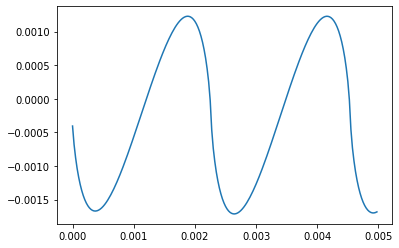

In [44]:
wave.segment(duration = 0.005).plot()

Это интересная форма перевёрнутой синусоиды.